In [1]:
#import library pycaret
#pip install pycaret
!pip install pycaret

     |████████████████████████████████| 188 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 63.9 MB 53.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 40.8 MB/s eta 0:00:01
     |████████████████████████████████| 378 kB 41.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 42.3 MB/s eta 0:00:01
     |████████████████████████████████| 259 kB 55.8 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 142.8 MB 49 kB/s s eta 0:00:01
     |████████████████████████████████| 60 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 7.0 MB 40.1 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 46.1 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 6.4 MB 42.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 38.6 MB/s eta 0:00:01
     |█████████████████████████████

     |████████████████████████████████| 64 kB 2.3 MB/s  eta 0:00:01


  Created wheel for awscli: filename=awscli-1.18.107-py2.py3-none-any.whl size=3283837 sha256=5c5912598985cf8a51ea98a3e9e16cca4b3ded98db446140ff4c5f80e6f8cbca
  Stored in directory: /root/.cache/pip/wheels/44/e8/0a/1957d999964cbfdff3e06841f6f4e2f067828f81f90b466bb6
  Created wheel for shap: filename=shap-0.32.1-cp37-cp37m-linux_x86_64.whl size=381808 sha256=1b413d0c7d15f9c02c3ae64b8633a28c0098d649f977d85de44ed86990806fb4
  Stored in directory: /root/.cache/pip/wheels/fb/73/18/f32e1b595c0bb416c036ac48442c8f74c37a2d80ee5d3d4f60
  Created wheel for pyod: filename=pyod-0.8.1-py3-none-any.whl size=105651 sha256=b10e7ef720ce01bfafe125358a3b049b459afb0a88fcc6c0b37fa339c75cea48
  Stored in directory: /root/.cache/pip/wheels/d6/f2/24/2c050361bd259bee34bbef8047bbcd3f08085f2a8a5ed1fc85
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=dd261d7dcbb4de6d3c6047a9fdb78623003e84493116f527b4fcc7bc52407293
  Stored in directory: /root/.cache/pip

In [2]:
#get the data
from pycaret.datasets import get_data

In [3]:
#load the dataset 
diabetes=get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#setting up the environment
from pycaret.classification import *

In [6]:
#setup the data
clf=setup(data=diabetes,target='Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2025
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
#check whether the data is imbalanced or not
imb=diabetes['Class variable'].value_counts()
imb

0    500
1    268
Name: Class variable, dtype: int64

In [8]:
#comapre the data with different ML models 
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.772700,0.000000,0.560200,0.738300,0.631000,0.471300
1,Linear Discriminant Analysis,0.770800,0.817300,0.560200,0.734200,0.629300,0.467800
2,CatBoost Classifier,0.763300,0.812100,0.624000,0.672300,0.645400,0.468400
3,Ada Boost Classifier,0.761800,0.802500,0.625400,0.678400,0.646100,0.467600
4,Gradient Boosting Classifier,0.761500,0.816200,0.634800,0.671300,0.649700,0.469400
5,Logistic Regression,0.759700,0.809800,0.539500,0.713100,0.608600,0.440400
6,Extreme Gradient Boosting,0.759700,0.814300,0.645600,0.665100,0.651800,0.468800
7,Light Gradient Boosting Machine,0.746800,0.788200,0.630100,0.648500,0.633300,0.441000
8,K Neighbors Classifier,0.739100,0.754800,0.570500,0.637200,0.595600,0.406100
9,Extra Trees Classifier,0.735600,0.777400,0.475400,0.680400,0.554000,0.375100


In [9]:
#Select the best model with better accuarcy and then create a model
gb=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8704,0.8827,0.7368,0.8750,0.8000,0.7051
1,0.7037,0.7444,0.6316,0.5714,0.6000,0.3656
2,0.8148,0.8857,0.7895,0.7143,0.7500,0.6035
3,0.7593,0.8135,0.6842,0.6500,0.6667,0.4785
4,0.6852,0.7459,0.6316,0.5455,0.5854,0.3338
5,0.7222,0.7218,0.5789,0.6111,0.5946,0.3836
6,0.8333,0.8812,0.6842,0.8125,0.7429,0.6209
7,0.7547,0.8349,0.5556,0.6667,0.6061,0.4301
8,0.6792,0.7857,0.4444,0.5333,0.4848,0.2548
9,0.7925,0.8667,0.6111,0.7333,0.6667,0.5178


In [10]:
extreme_b=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.8737,0.7368,0.7778,0.7568,0.6301
1,0.6852,0.7323,0.6316,0.5455,0.5854,0.3338
2,0.7778,0.8677,0.7368,0.6667,0.7000,0.5242
3,0.7778,0.8346,0.7368,0.6667,0.7000,0.5242
4,0.7037,0.7865,0.6842,0.5652,0.6190,0.3802
5,0.7407,0.7218,0.5789,0.6471,0.6111,0.4176
6,0.8333,0.8647,0.6842,0.8125,0.7429,0.6209
7,0.7547,0.8095,0.5556,0.6667,0.6061,0.4301
8,0.7170,0.8032,0.5556,0.5882,0.5714,0.3604
9,0.7736,0.8492,0.5556,0.7143,0.6250,0.4664


In [11]:
log_model=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8519,0.8511,0.6842,0.8667,0.7647,0.6588
1,0.7222,0.7865,0.4737,0.6429,0.5455,0.3520
2,0.7963,0.8451,0.6842,0.7222,0.7027,0.5479
3,0.7222,0.7594,0.5263,0.6250,0.5714,0.3682
4,0.7593,0.8105,0.5789,0.6875,0.6286,0.4524
5,0.7407,0.7699,0.4737,0.6923,0.5625,0.3874
6,0.7778,0.8436,0.4737,0.8182,0.6000,0.4609
7,0.7358,0.7952,0.5556,0.6250,0.5882,0.3948
8,0.6981,0.7825,0.5000,0.5625,0.5294,0.3083
9,0.7925,0.8540,0.4444,0.8889,0.5926,0.4734


In [12]:
ridge=create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8519,0.0,0.6842,0.8667,0.7647,0.6588
1,0.7222,0.0,0.5263,0.6250,0.5714,0.3682
2,0.7963,0.0,0.6842,0.7222,0.7027,0.5479
3,0.7593,0.0,0.5789,0.6875,0.6286,0.4524
4,0.7593,0.0,0.6316,0.6667,0.6486,0.4658
5,0.7778,0.0,0.5263,0.7692,0.6250,0.4749
6,0.8148,0.0,0.5263,0.9091,0.6667,0.5507
7,0.7736,0.0,0.5556,0.7143,0.6250,0.4664
8,0.6792,0.0,0.4444,0.5333,0.4848,0.2548
9,0.7925,0.0,0.4444,0.8889,0.5926,0.4734


In [13]:
#Hyper parameter technique in pycaret just simply write "tune_model"
tuned_model=tune_model('gbc',round=3,n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.778,0.812,0.632,0.706,0.667,0.501
1,0.704,0.758,0.632,0.571,0.600,0.366
2,0.833,0.857,0.789,0.750,0.769,0.639
3,0.759,0.788,0.684,0.650,0.667,0.478
4,0.741,0.797,0.632,0.632,0.632,0.432
5,0.759,0.764,0.526,0.714,0.606,0.438
6,0.796,0.866,0.684,0.722,0.703,0.548
7,0.736,0.808,0.444,0.667,0.533,0.359
8,0.755,0.819,0.611,0.647,0.629,0.446
9,0.774,0.838,0.444,0.800,0.571,0.434


In [14]:
#Ensemble method in pycaret simply wwrite "ensemble_model"
ensemble_method=ensemble_model(gb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.8511,0.6842,0.8125,0.7429,0.6209
1,0.7222,0.7805,0.6842,0.5909,0.6341,0.4122
2,0.7593,0.8632,0.7368,0.6364,0.6829,0.4906
3,0.7222,0.8361,0.6842,0.5909,0.6341,0.4122
4,0.7593,0.8226,0.6842,0.6500,0.6667,0.4785
5,0.7222,0.7459,0.4737,0.6429,0.5455,0.3520
6,0.8148,0.8872,0.6842,0.7647,0.7222,0.5840
7,0.8113,0.8063,0.6667,0.7500,0.7059,0.5677
8,0.6981,0.7889,0.5000,0.5625,0.5294,0.3083
9,0.7925,0.8635,0.5556,0.7692,0.6452,0.5038


## Blend models
Blending models is a method of ensembling which uses consensus among estimators
to generate final predictions. The idea behind blending is to combine different
machine learning algorithms and use a majority vote or the average predicted probabilities 
in case of classification to predict the final outcome.

In [15]:
blend_all=blend_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8148,0.0,0.6842,0.7647,0.7222,0.5840
1,0.6852,0.0,0.5263,0.5556,0.5405,0.3014
2,0.7963,0.0,0.5789,0.7857,0.6667,0.5248
3,0.7407,0.0,0.5263,0.6667,0.5882,0.4028
4,0.7407,0.0,0.5263,0.6667,0.5882,0.4028
5,0.7593,0.0,0.4737,0.7500,0.5806,0.4236
6,0.8333,0.0,0.6316,0.8571,0.7273,0.6112
7,0.7547,0.0,0.5000,0.6923,0.5806,0.4136
8,0.6981,0.0,0.4444,0.5714,0.5000,0.2886
9,0.7736,0.0,0.4444,0.8000,0.5714,0.4342


## Stack model

Stacking models is method of ensembling that uses meta learning. The idea behind stacking is
to build a meta model that generates the final prediction using the prediction of multiple base
estimators.

This function takes a list of trained models using estimator_list parameter. 
All these models form the base layer of stacking and their predictions are 
used as an input for a meta model that can be passed using meta_model parameter. 
If no meta model is passed, a linear model is used by default

In [16]:
stacked=stack_models(estimator_list=[ridge,extreme_b,log_model],meta_model=gb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8519,0.8662,0.7368,0.8235,0.7778,0.6672
1,0.7037,0.7805,0.6316,0.5714,0.6000,0.3656
2,0.7963,0.8797,0.7368,0.7000,0.7179,0.5587
3,0.7778,0.8271,0.7368,0.6667,0.7000,0.5242
4,0.6852,0.7549,0.6316,0.5455,0.5854,0.3338
5,0.6667,0.7534,0.4211,0.5333,0.4706,0.2322
6,0.8333,0.9023,0.6316,0.8571,0.7273,0.6112
7,0.7736,0.8222,0.5556,0.7143,0.6250,0.4664
8,0.7358,0.7587,0.5556,0.6250,0.5882,0.3948
9,0.8491,0.8825,0.6111,0.9167,0.7333,0.6339


## Plot model
Analyzing performance of trained machine learning model is an integral step in
any machine learning workflow. Analyzing model performance in PyCaret is as simple 
as writing plot_model. The function takes trained model object and type of plot as string within plot_model function.

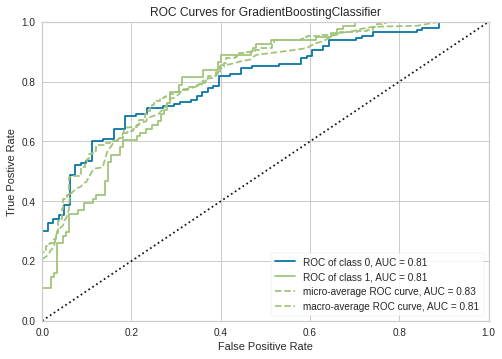

In [17]:
plot_model(gb)

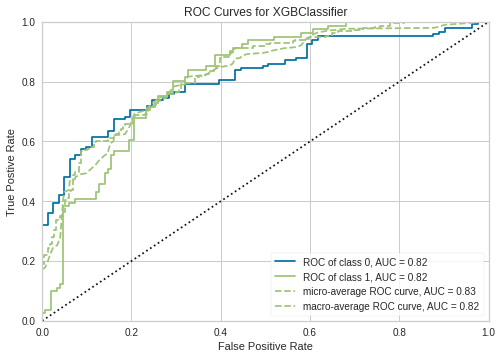

In [18]:
plot_model(extreme_b)

## Interpet model
Interpreting complex models are of fundamental importance in machine learning. 
Model Interpretability helps debug the model by analyzing what the model really 
thinks is important. Interpreting models in PyCaret is as simple as writing interpret_model. 
The function takes trained model object and type of plot as string. Interpretations are 
implemented based on the SHAP (SHapley Additive exPlanations) and is only available for tree-based models.

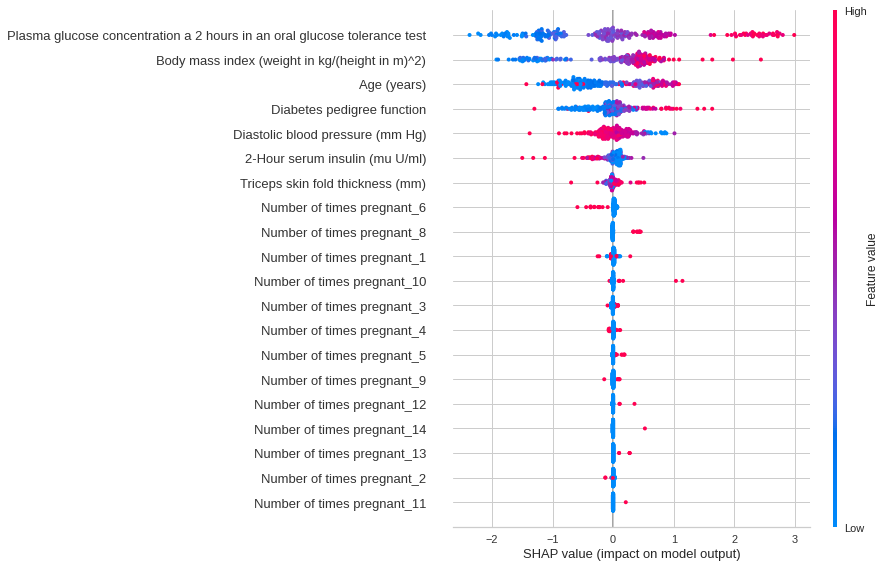

In [19]:
interpret_model(gb)

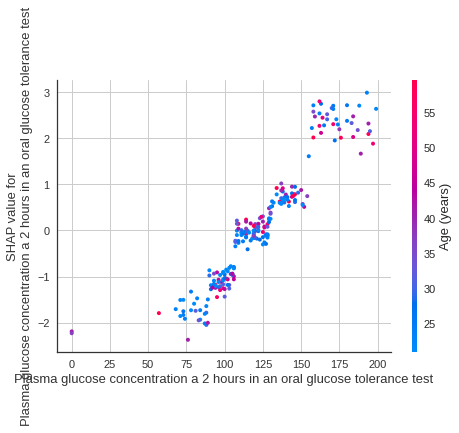

In [20]:
#Correlation plot
interpret_model(gb,plot='correlation')

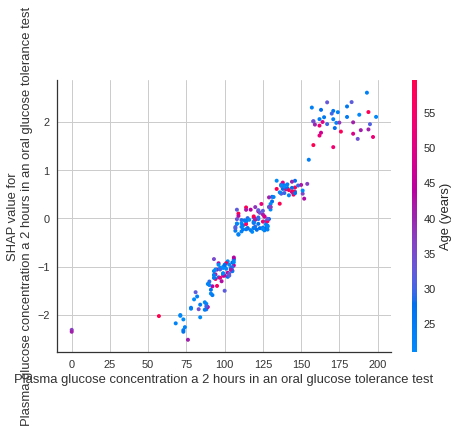

In [21]:
interpret_model(extreme_b,plot='correlation')

In [22]:
#reason plot or observational plot
interpret_model(gb,plot='reason',observation=10)

In [23]:
interpret_model(extreme_b,plot='reason',observation=20)

## Claibrate models
When performing Classification experiments you often want to predict not only the class labels, but also obtain a probability of the prediction. This probability gives you some kind of confidence. Some models can give you poor estimates of the class probabilities. Well calibrated classifiers are probabilistic classifiers for which the probability output can be directly interpreted as a confidence level. Calibrating classification models in PyCaret is as simple as writing calibrate_model. The functions takes a trained model object and method of calibration through method parameter. Method can be ‘sigmoid‘ which corresponds to Platt’s method or ‘isotonic‘ which is a non-parametric approach. It is not advised to use isotonic calibration with too few calibration samples (<<1000) since it tends to overfit. This functions returns a table with k-fold cross validated scores of classification evaluation metrics (Accuracy, AUC, Recall, Precision, F1 and Kappa) along with trained model object.

In [24]:
calibrate_model=calibrate_model(gb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.8722,0.6842,0.8125,0.7429,0.6209
1,0.7222,0.7474,0.6316,0.6000,0.6154,0.3982
2,0.8333,0.8707,0.7368,0.7778,0.7568,0.6301
3,0.7222,0.8165,0.5789,0.6111,0.5946,0.3836
4,0.7037,0.7639,0.5263,0.5882,0.5556,0.3344
5,0.7037,0.7338,0.4737,0.6000,0.5294,0.3175
6,0.7593,0.8842,0.4737,0.7500,0.5806,0.4236
7,0.7925,0.8317,0.5556,0.7692,0.6452,0.5038
8,0.6981,0.7968,0.3889,0.5833,0.4667,0.2677
9,0.7925,0.8730,0.5000,0.8182,0.6207,0.4890


## Optimize threshold
In Classification problems the cost of false positives are almost never same as cost of false negatives. As such, if you are optimizing a business problem where Type 1 and Type 2 errors have different impact, you can optimize your classifier for a probability threshold value to optimize the custom loss function simply by defining cost of true positives, true negatives, false positives and false negatives separately. Optimizing threshold in PyCaret is as simple as writing optimize_threshold. It takes a trained model object (a classifier) and the loss function simply represented by true positives, true negatives, false positives and false negatives. This function returns an interactive plot where loss function (y-axis) is represented as a function of different probability threshold values on x-axis. A vertical line is then shown to represent the best value of probability threshold for that specific classifier. Probability threshold optimized using optimize_threshold can then be used in predict_model function to generate labels using the custom probability threshold. Normally, all classifiers are trained to predict positive class at 50%.

In [25]:
optimize_threshold(gb, true_negative = 1500, false_negative = -5000)

Optimized Probability Threshold: 0.18 | Optimized Cost Function: 90000


## Predict model
Once a model is successfully deployed either on cloud using deploy_model or locally using save_model, it can be used to predict on unseen data using predict_model function. This functions takes a trained model object and the dataset to predict. It will automatically apply the entire transformation pipeline created during the experiment. For classification, predicted labels are created based on 50% probability, but if you choose to use a different threshold that you may have obtained using optimize_threshold, you can pass the probability_threshold parameter within predict_model. This function can also be used to generate predictions on hold-out / test set.

In [26]:
pred=predict_model(log_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.7749,0.811,0.6049,0.7101,0.6533,0.4882


In [27]:
predict_model(log_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.7749,0.811,0.6049,0.7101,0.6533,0.4882


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,99.0,74.0,27.0,0.0,29.0,0.203,32.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.2068
1,106.0,80.0,0.0,0.0,23.6,0.137,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2059
2,119.0,0.0,0.0,0.0,32.4,0.141,24.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5606
3,92.0,62.0,25.0,41.0,19.5,0.482,25.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0715
4,142.0,60.0,33.0,190.0,28.8,0.687,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.6883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.0,80.0,32.0,0.0,41.0,0.346,37.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.0286
227,130.0,82.0,0.0,0.0,39.1,0.956,37.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.5661
228,146.0,70.0,38.0,360.0,28.0,0.337,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.2318
229,162.0,84.0,0.0,0.0,27.7,0.182,54.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.6499


In [28]:
predict_model(ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.7576,0,0.5679,0.6866,0.6216,0.4456


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_2,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label
0,99.0,74.0,27.0,0.0,29.0,0.203,32.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1,106.0,80.0,0.0,0.0,23.6,0.137,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,119.0,0.0,0.0,0.0,32.4,0.141,24.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,92.0,62.0,25.0,41.0,19.5,0.482,25.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,142.0,60.0,33.0,190.0,28.8,0.687,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.0,80.0,32.0,0.0,41.0,0.346,37.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
227,130.0,82.0,0.0,0.0,39.1,0.956,37.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
228,146.0,70.0,38.0,360.0,28.0,0.337,29.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
229,162.0,84.0,0.0,0.0,27.7,0.182,54.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


## Finalize model
Finalize model is the last step in a typical supervised experiment workflow. When an experiment is started in PyCaret using setup, a hold-out set is created that is not being used in model training. By default, if no train_size parameter is defined in setup, hold-out set contains 30% sample of the dataset. All the functions in PyCaret use the remaining 70% as training set to create, tune or ensemble models. As such, the hold-out set is the final assurance and used for diagnosis of overfitting / underfitting. However, once the predictions are generated on hold-out set using predict_model and you have chosen to deploy the specific model, you want to train your model for one final time on the entire dataset including hold-out. Finalizing the model on entire dataset is as easy as writing finalize_model. This function takes trained model object and returns a model that has been trained on the entire dataset. 

In [29]:
finalize_model(ridge)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2025,
                solver='auto', tol=0.001)

In [ ]:
save_model(ridge,'best_model')